<a href="https://colab.research.google.com/github/jramirezpr/classifiers/blob/master/mobilenet_v2ImagenetForFashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

     |████████████████████████████████| 445.9MB 34kB/s 
     |████████████████████████████████| 3.9MB 25.0MB/s 
     |████████████████████████████████| 2.9MB 32.1MB/s 
     |████████████████████████████████| 460kB 43.7MB/s 
     |████████████████████████████████| 26.1MB 21.8MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: tb-nightly 2.2.0a20191223 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0
  Found existing installation: scipy 1.3.3
    Uninstalling s

In [2]:
!pip install -U tf-hub-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

     |████████████████████████████████| 92kB 2.8MB/s 


In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" #@param {type:"string"}

In [0]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [0]:
import numpy as np
import PIL.Image as Image



In [11]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


In [41]:
from google.colab import files
uploaded = files.upload()


Saving 1541.jpg to 1541.jpg


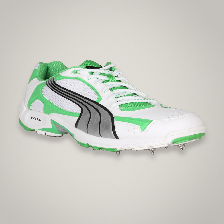

In [43]:
imageshoe = Image.open("1541.jpg").resize(IMAGE_SHAPE)
imageshoe

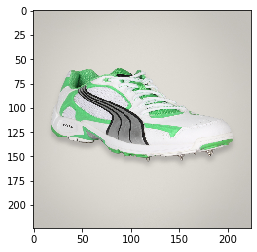

In [44]:
imageshoe =  np.array(imageshoe)/255.0
imageshoe.shape
plt.imshow(imageshoe)

In [0]:
result = classifier.predict(imageshoe[np.newaxis, ...])


In [46]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

771

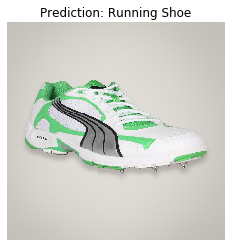

In [47]:
plt.imshow(imageshoe)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())